GOALS
1. [x] EDA notebook for building the churn.csv.
2. [x] Revision of pandas: groupby, indexing, and more useful.
3. [x] get the better understanding of the churn data.
4. [x] Practise of seaborn and matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
churn_df = pd.read_csv('../input/telecom_churn.csv')
print(churn_df.shape)
churn_df.head()

(3333, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
def get_categorial_features(df):
    categorical_feat = [col for col in df.columns if df[col].dtype == 'O']
    print('Found {} Categorical columns'.format(len(categorical_feat)))
    return categorical_feat

categorical_features = get_categorial_features(churn_df)
categorical_features

Found 3 Categorical columns


['State', 'International plan', 'Voice mail plan']

In [4]:
def preprocessing(df):
    # lower case column names and sepaating by '_'
    cols = [col.lower().replace(' ', '_') for col in df.columns]
    df.columns = cols 
    
    # droping state column and saving into a var 
    states = df['state']
    df.drop('state', axis=1, inplace=True)
    
    # encoding categorical variables
    map_dict = {'Yes': 1, 'No' : 0}
    df['international_plan'] = df['international_plan'].map(map_dict)
    df['voice_mail_plan'] = df['voice_mail_plan'].map(map_dict)
    df['churn'] = df['churn'].map({False : 0 , True : 1 })
    df.columns
    return df 
    
churn_df = preprocessing(churn_df)
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
def drop_features(df):
    df['total_national_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_national_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_national_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
    
    drop_list = [col for col in df.columns if ('total' in col) & ('intl' not in col ) & ('national' not in col)]
    df.drop(drop_list, axis=1, inplace=True)
    return df

In [6]:
churn_df = drop_features(churn_df)

In [7]:
churn = churn_df['churn'] == 1
not_churn = churn_df['churn'] == 0 

In [8]:
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_national_minutes,total_national_calls,total_national_charge
0,128,415,0,1,25,10.0,3,2.70,1,0,707.2,300,72.86
1,107,415,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
2,137,415,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
3,84,408,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
4,75,415,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36


In [9]:
100 * churn_df['churn'].value_counts(normalize=True) 

0    85.508551
1    14.491449
Name: churn, dtype: float64

Observation: Around 14.5% of the customer are churned

**Account Length** 

Account length is how long the client has been with the company.

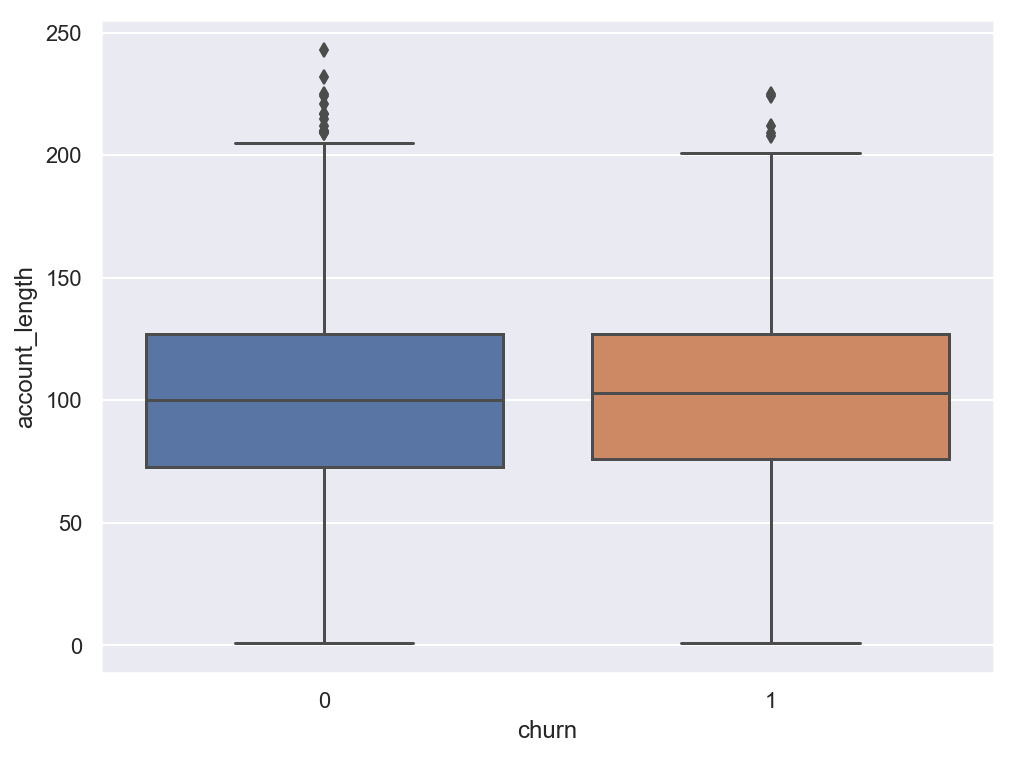

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='churn', y='account_length', data=churn_df);

Observation: We can say that on average both type of customers spent same amount of time with us. 

**Area Code**

In [11]:
churn_df.groupby(['churn', 'area_code'])['account_length'].count()

churn  area_code
0      408           716
       415          1419
       510           715
1      408           122
       415           236
       510           125
Name: account_length, dtype: int64

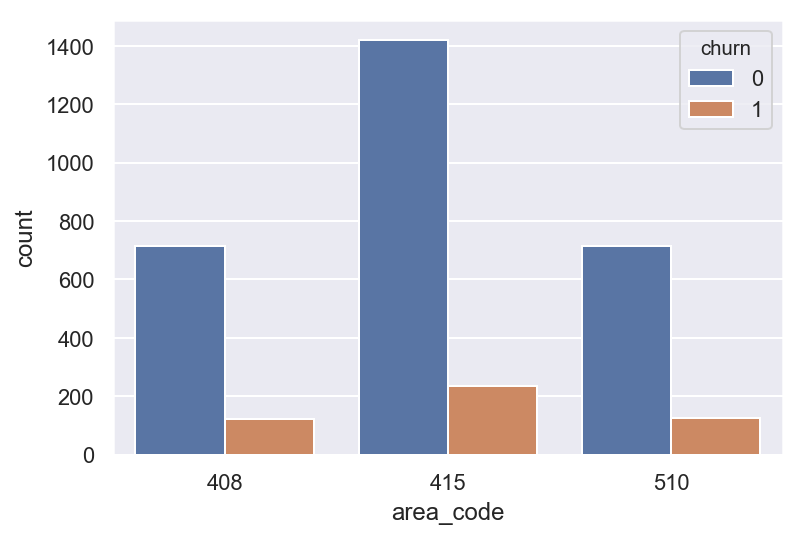

In [12]:
sns.countplot(x='area_code', data=churn_df, hue='churn'); 

**Plan level**

In [13]:
def category_count(col):
    """
    col : column or list of columns
    """
    
    for col in plan_cols:
        _ = churn_df[col].value_counts(normalize=True) * 100
        print(round(_, 2))

In [14]:
plan_cols = [col for col in churn_df.columns if 'plan' in col]
category_count(plan_cols)

0    90.31
1     9.69
Name: international_plan, dtype: float64
0    72.34
1    27.66
Name: voice_mail_plan, dtype: float64


Observation: 
1. Only about 9.5 % of users have international plan 
2. 27.6% of users have voice mail plan

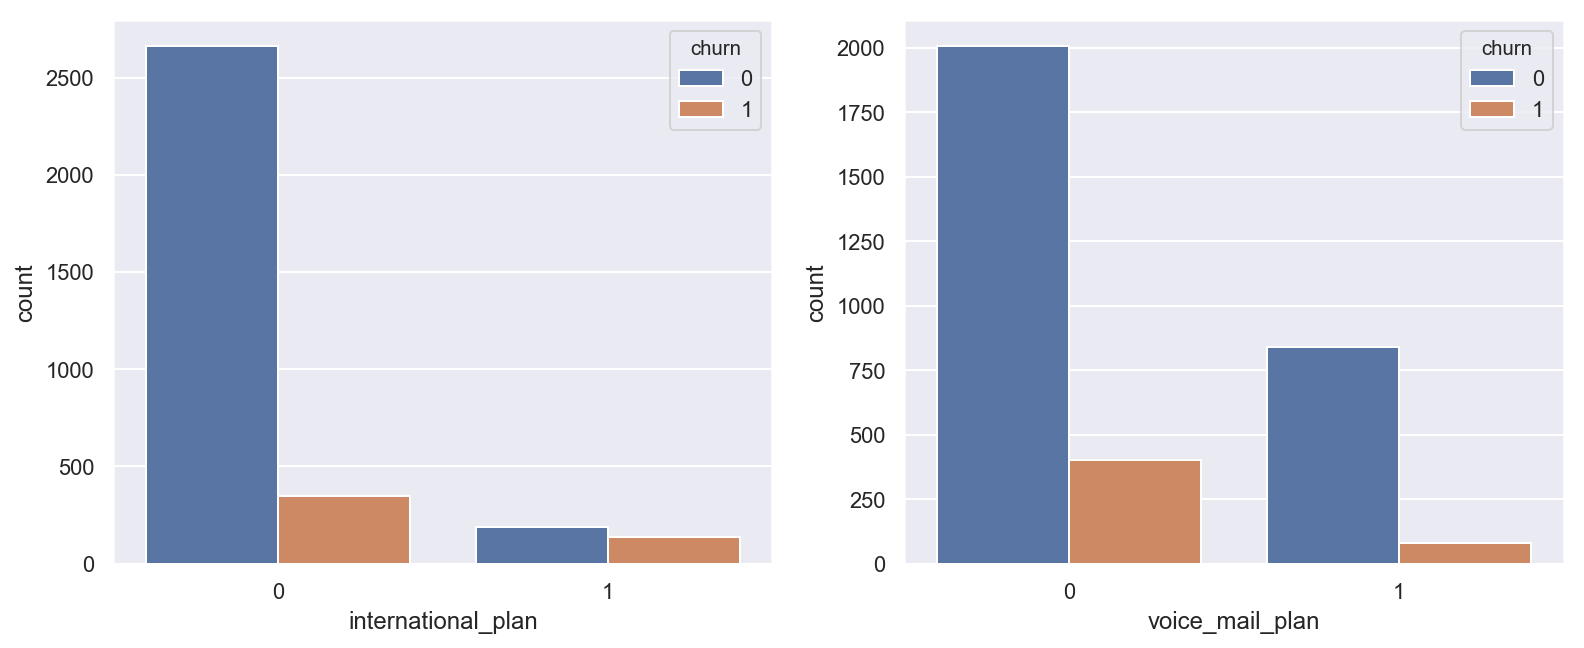

In [15]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

for i, col in enumerate(plan_cols):
    sns.countplot(x=col, data=churn_df, ax=ax[i], hue='churn')

In [16]:
viz_col = ['total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
            'total_national_minutes','total_national_calls', 'total_national_charge']

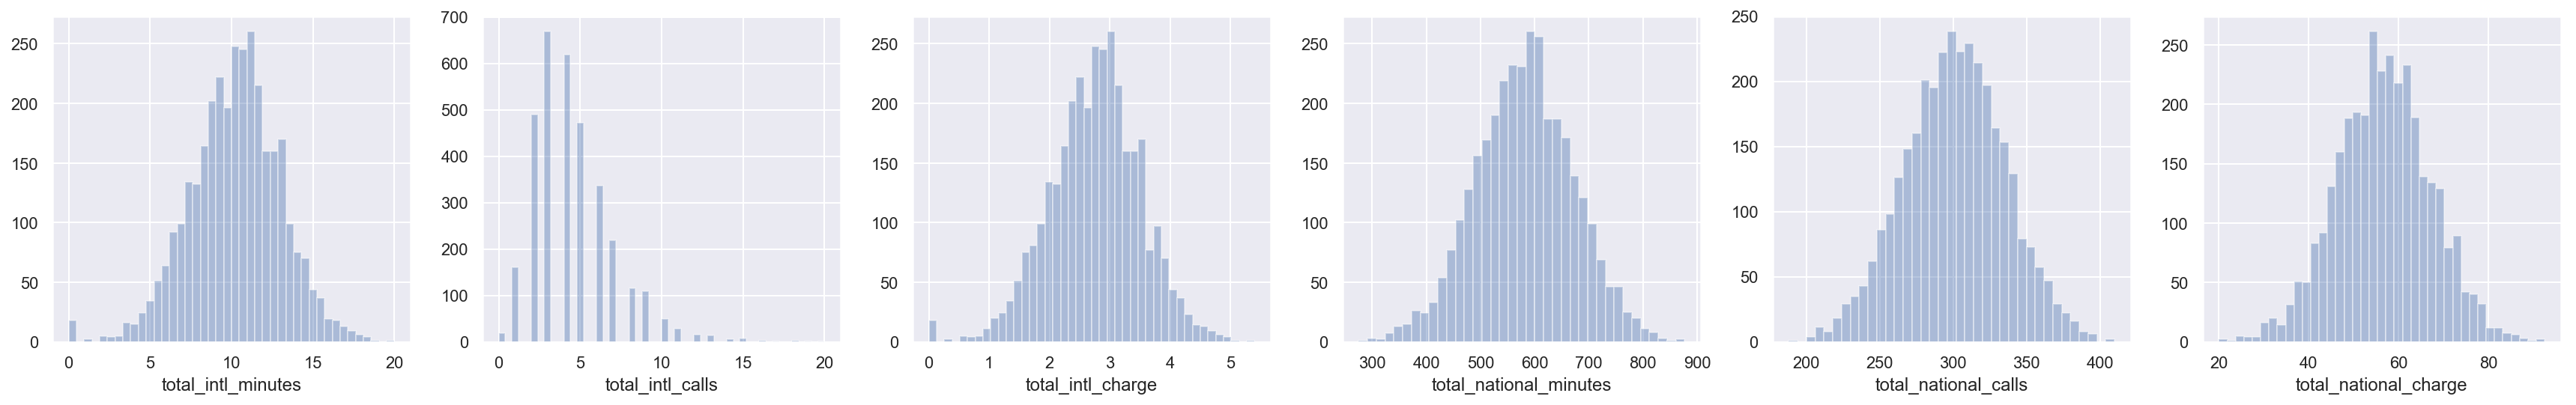

In [17]:
fig, ax = plt.subplots(ncols=len(viz_col) , figsize=(30, 4))

for i, col in enumerate(viz_col):
    sns.distplot(a= churn_df[col], ax=ax[i], kde=False)


Observation: Except for number total international calls all of above features follows normal curve.

It would be nice to see distribution by churn or not churned.

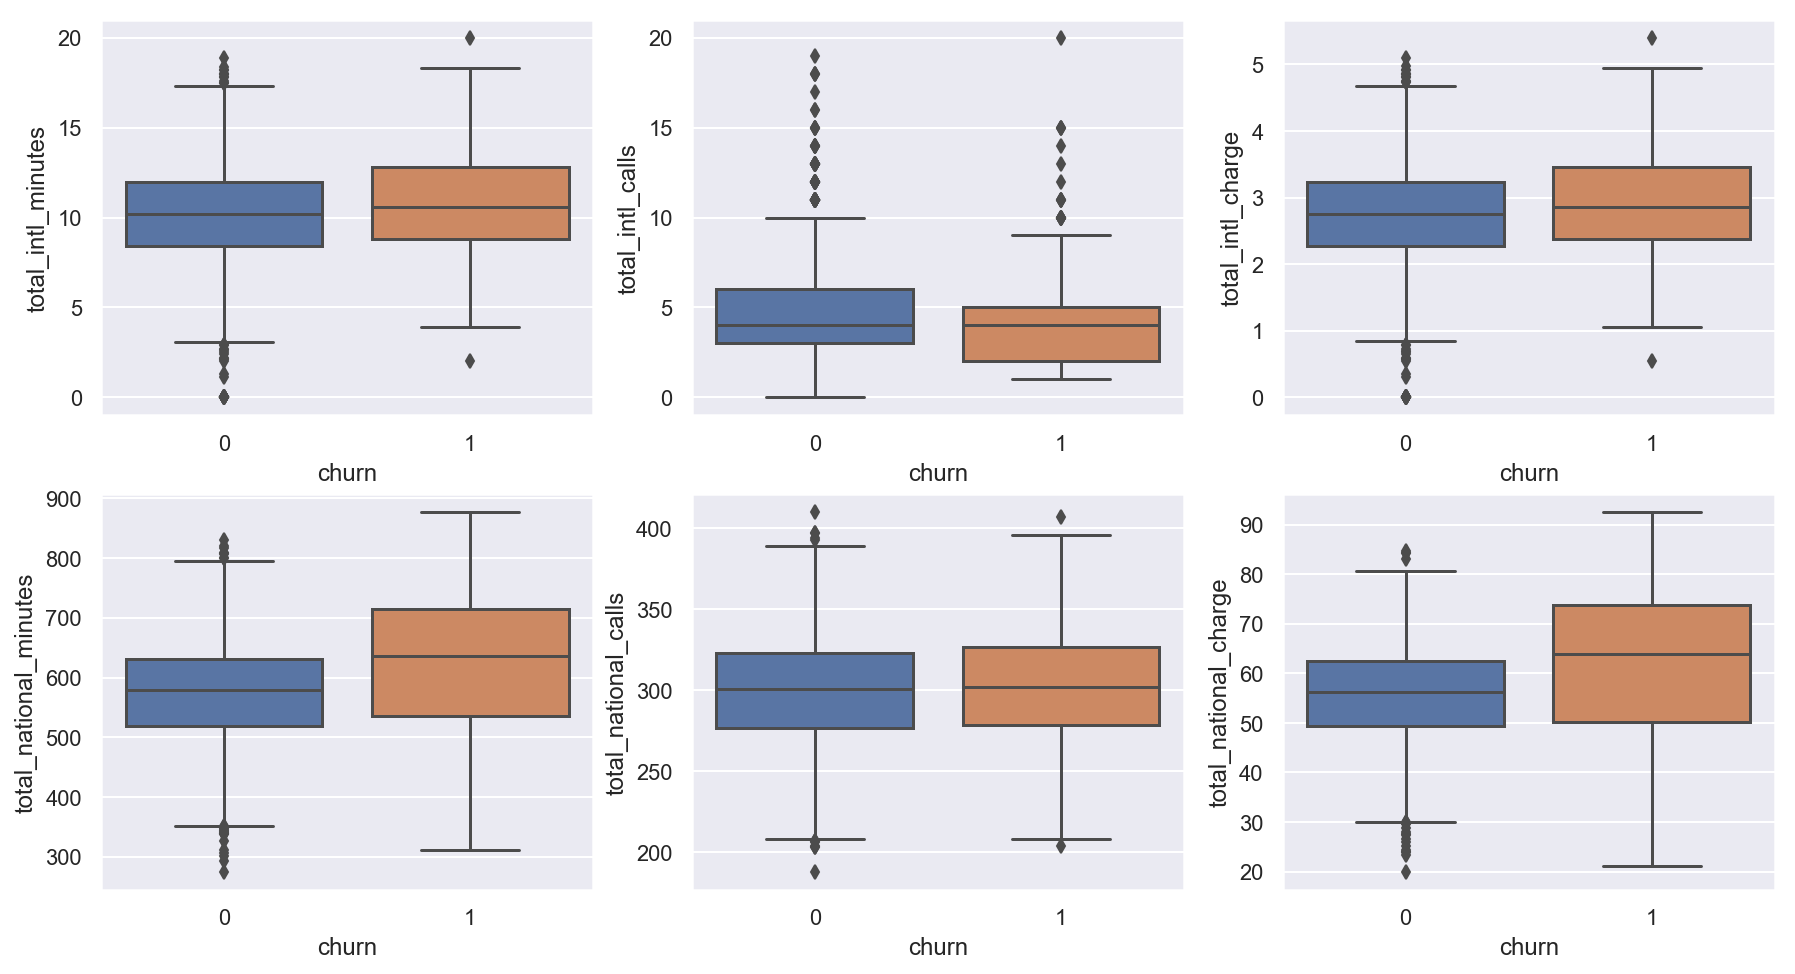

In [18]:
fig , axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))

for idx, col in enumerate(viz_col):
    ax = axes[int(idx / 3), idx % 3]
#     print(ax)
    sns.boxplot(x='churn', y=col, data=churn_df, ax=ax)

Observation

The number of call(both national and internaltional) for churn and non churned customer are almost same for but the total mintues are churn users are high which obsvisuily end up have high charges. 

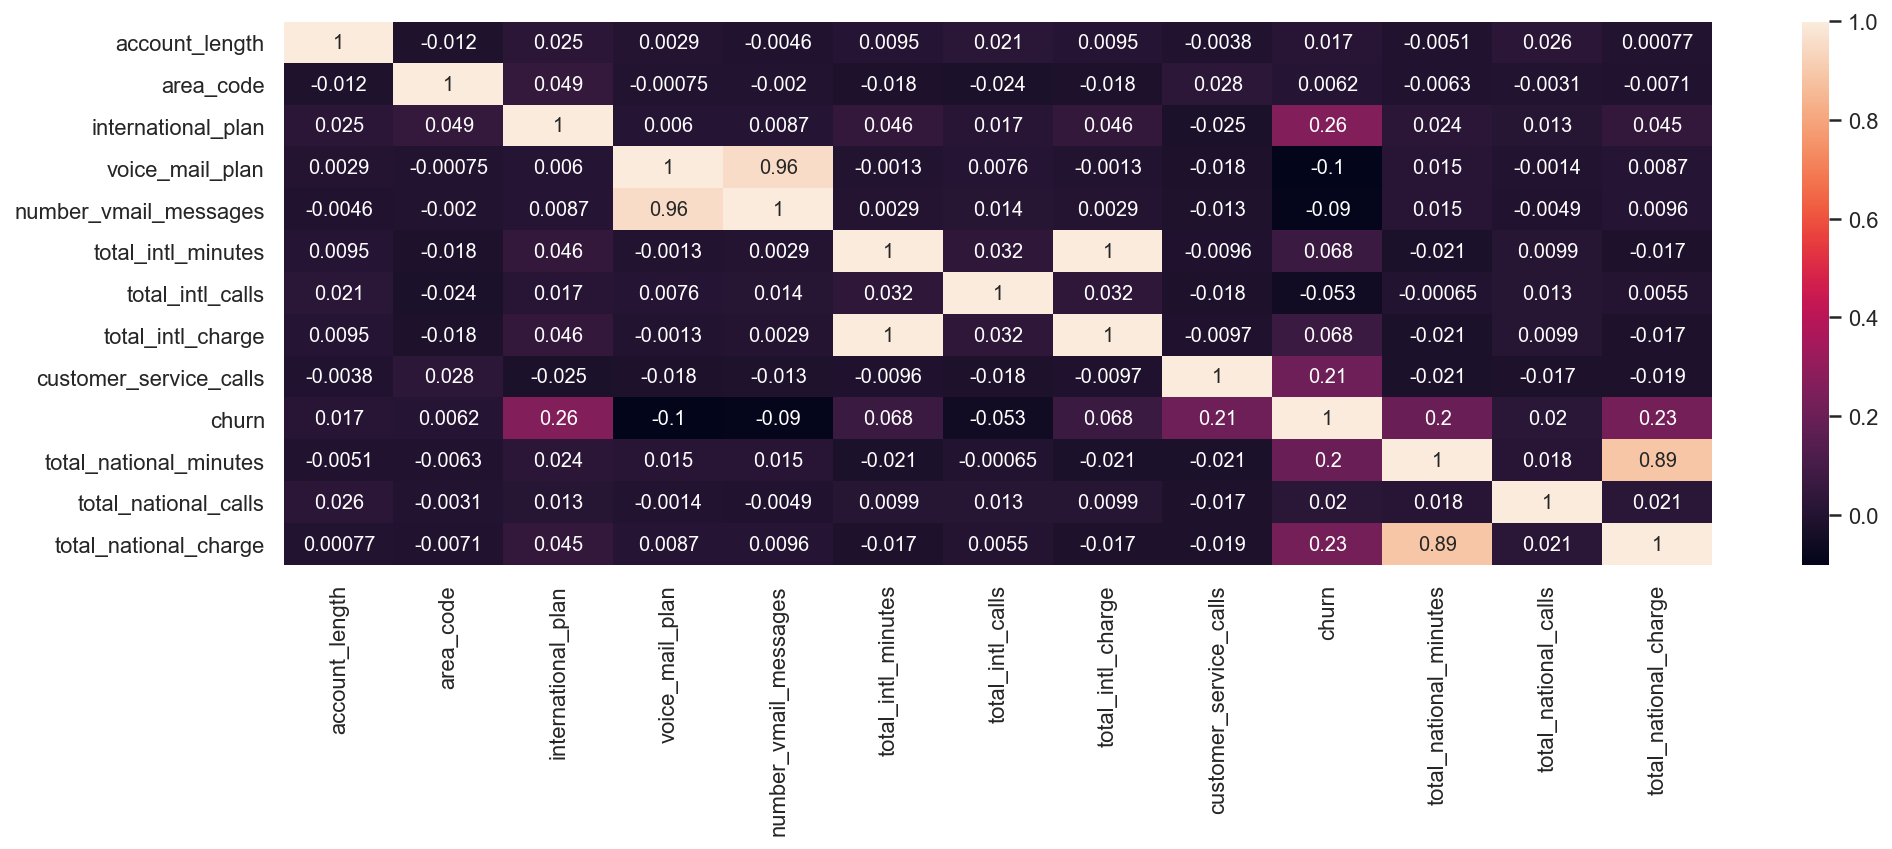

In [19]:
corr_matrix = churn_df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, annot=True);

charges are calculated from the minutes columns so we drop the charges column

In [20]:
churn_df.drop(['total_intl_charge', 'total_national_charge'], axis=1, inplace=True)

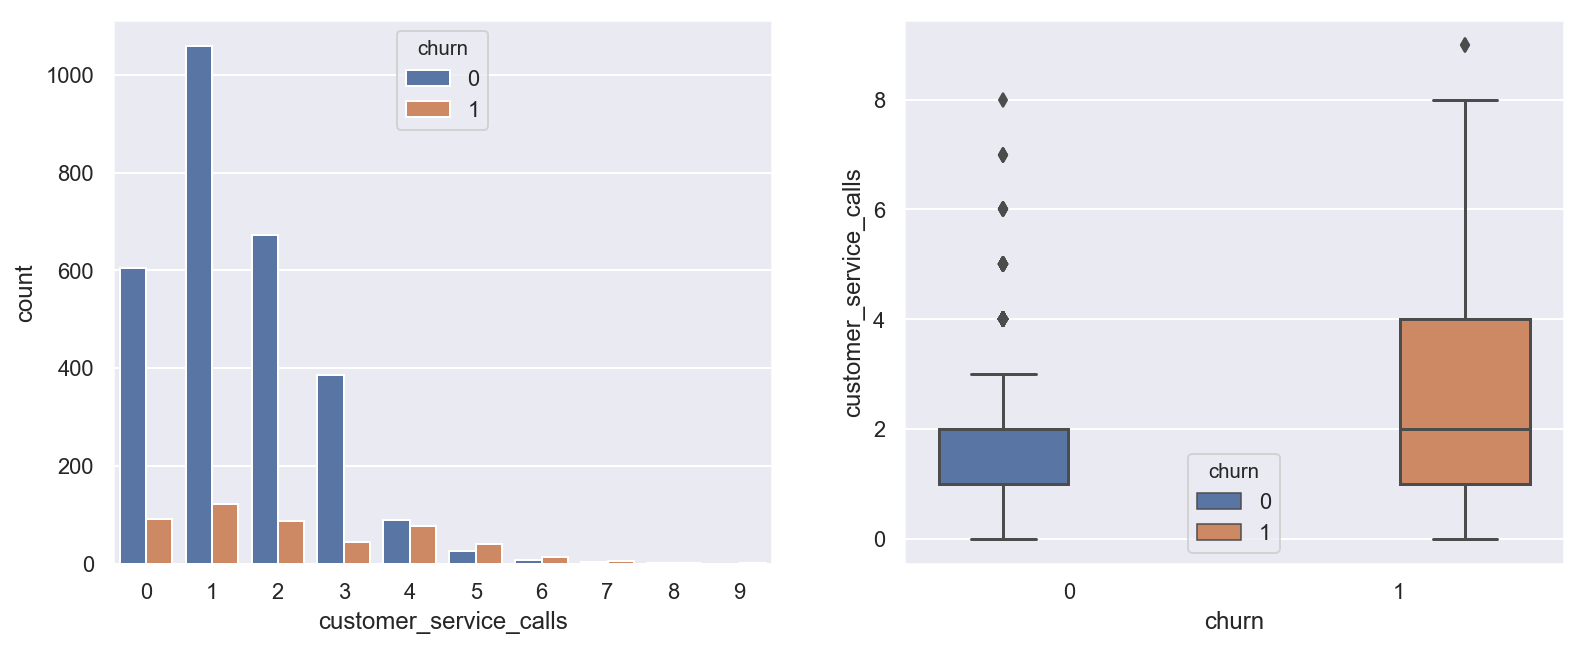

In [21]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

sns.countplot(x='customer_service_calls', data=churn_df, ax=ax[0], hue='churn')
sns.boxplot(x='churn', y ='customer_service_calls' ,data=churn_df, ax=ax[1], hue='churn') ; 

Obsersavtion: Most of the users churn after 2 customer calls.

In [22]:
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,customer_service_calls,churn,total_national_minutes,total_national_calls
0,128,415,0,1,25,10.0,3,1,0,707.2,300
1,107,415,0,1,26,13.7,3,1,0,611.5,329
2,137,415,0,0,0,12.2,5,0,0,527.2,328
3,84,408,1,0,0,6.6,7,2,0,558.2,248
4,75,415,1,0,0,10.1,3,3,0,501.9,356
